<h1 style="text-align: center;">Homework 4</h1>

Scrape trending YouTube videos (https://www.youtube.com/feed/trending) to get the following data on each movie:

<ul>
    <li>URL,</li>
    <li>title,</li>
    <li>duration,</li>
    <li>username,</li>
    <li>views.</li>
</ul>
<ol>
    <li>Get the data using BeautifulSoup,</li>
    <li>Get the data using lxml,</li>
    <li>Get the data using Selenium,</li>
    <li>Save the data into a CSV and a JSON file.</li>
</ol>
Please, provide separate Jupyter notebooks (or .py files) for point 1-3. Make sure to receive data on all trending movies. Anything additional (e.g. saving data also as a XML file or calculating the average number of views) is highly welcomed.



## BeautifulSoup

In [159]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup
from pprint import pprint
import time

import json
from xml.dom.minidom import parseString
from dicttoxml import dicttoxml
import xml.etree.ElementTree as ET

In [42]:
base_url = "https://www.youtube.com"
url = "https://www.youtube.com/feed/trending"

In [23]:
response = requests.get(url)
page = response.content
page = BeautifulSoup(page, "html.parser")

In [78]:
trending = {}
divs = page.find_all("div", class_="yt-lockup-content")
trending["URL"] = [base_url + i.find("a").get("href") for i in divs]
trending["Title"] = [i.find("a").get_text() for i in divs]
trending["Duration"] = [i.find("span", class_="accessible-description").get_text().replace("- Duration: ", '') for i in divs]
trending["Username"] = [i.find("a", class_="yt-uix-sessionlink spf-link ").get_text() for i in divs]
trending["Views"] = [i.find("ul", class_="yt-lockup-meta-info").find_all("li")[1].get_text().replace(" views", '') for i in divs]
trending_df = pd.DataFrame(trending)
trending_df.head()

,URL,Title,Duration,Username,Views
0,https://www.youtube.com/watch?v=RI7WyhWZkzk,Star Wars: The Clone Wars Official Trailer,2:42.,Star Wars,"2,338,717"
1,https://www.youtube.com/watch?v=CAb_bCtKuXg,Life is Fun - Ft. Boyinaband (Official Music V...,4:01.,TheOdd1sOut,"3,311,265"
2,https://www.youtube.com/watch?v=bhxhNIQBKJI,Troye Sivan - Dance To This ft. Ariana Grande,4:09.,Troye Sivan,"3,095,393"
3,https://www.youtube.com/watch?v=COD9hcTpGWQ,Trevor Responds to Criticism from the French A...,8:26.,The Daily Show with Trevor Noah,"1,798,575"
4,https://www.youtube.com/watch?v=wHrckdJnAN0,Buddy - Hey Up There (Official Video) ft. Ty D...,3:27.,Buddy,"1,841,263"


In [79]:
trending_df.describe()

,URL,Title,Duration,Username,Views
count,65,65,65,65,65
unique,65,65,63,63,65
top,https://www.youtube.com/watch?v=RQTgJRwMdKQ,Ice Cream | Basics with Babish,3:26.,Jimmy Kimmel Live,"901,173"
freq,1,1,2,2,1


In [80]:
trending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 5 columns):
URL         65 non-null object
Title       65 non-null object
Duration    65 non-null object
Username    65 non-null object
Views       65 non-null object
dtypes: object(5)
memory usage: 2.6+ KB


Cleaning values of DataFrame and changing data type of Views to numeric

In [81]:
trending_df.Duration = trending_df.Duration.str.replace(".", '')
trending_df.Views = trending_df.Views.str.replace(",", '')
trending_df.Views = trending_df.Views.apply(pd.to_numeric)

In [82]:
trending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 5 columns):
URL         65 non-null object
Title       65 non-null object
Duration    65 non-null object
Username    65 non-null object
Views       65 non-null int64
dtypes: int64(1), object(4)
memory usage: 2.6+ KB


Saving data to .csv, .json, .xml files

In [84]:
trending_df.to_csv("you_tube_trend.csv")

In [85]:
with open("you_tube_trend.json", "w") as file:
    file.write(json.dumps(trending))

In [115]:
trending_xml = dicttoxml(trending)
dom = parseString(trending_xml)
print(dom.toprettyxml())

<?xml version="1.0" ?>
<root>
	<URL type="list">
		<item type="str">https://www.youtube.com/watch?v=RI7WyhWZkzk</item>
		<item type="str">https://www.youtube.com/watch?v=CAb_bCtKuXg</item>
		<item type="str">https://www.youtube.com/watch?v=bhxhNIQBKJI</item>
		<item type="str">https://www.youtube.com/watch?v=COD9hcTpGWQ</item>
		<item type="str">https://www.youtube.com/watch?v=wHrckdJnAN0</item>
		<item type="str">https://www.youtube.com/watch?v=LdH7aFjDzjI</item>
		<item type="str">https://www.youtube.com/watch?v=SDaOmwaYDHw</item>
		<item type="str">https://www.youtube.com/watch?v=FpZBSrosoeU</item>
		<item type="str">https://www.youtube.com/watch?v=ew1JYegKF7s</item>
		<item type="str">https://www.youtube.com/watch?v=azAEHCQgcUI</item>
		<item type="str">https://www.youtube.com/watch?v=5E40mf0MNb0</item>
		<item type="str">https://www.youtube.com/watch?v=j8BfPkcnE2A</item>
		<item type="str">https://www.youtube.com/watch?v=zIHaquWY4Qk</item>
		<item type="str">https://www.youtube.co

In [116]:
trending_xml = trending_xml.decode("utf-8")

In [119]:
with open("you_tube_trend.xml", "w", encoding='utf-8') as file:
    file.write(trending_xml)

In [135]:
trending_df.describe()

,Views
count,6.500000e+01
mean,3.049695e+06
std,4.768713e+06
min,3.935780e+05
25%,1.126516e+06
50%,1.626397e+06
75%,2.726647e+06
max,3.395920e+07


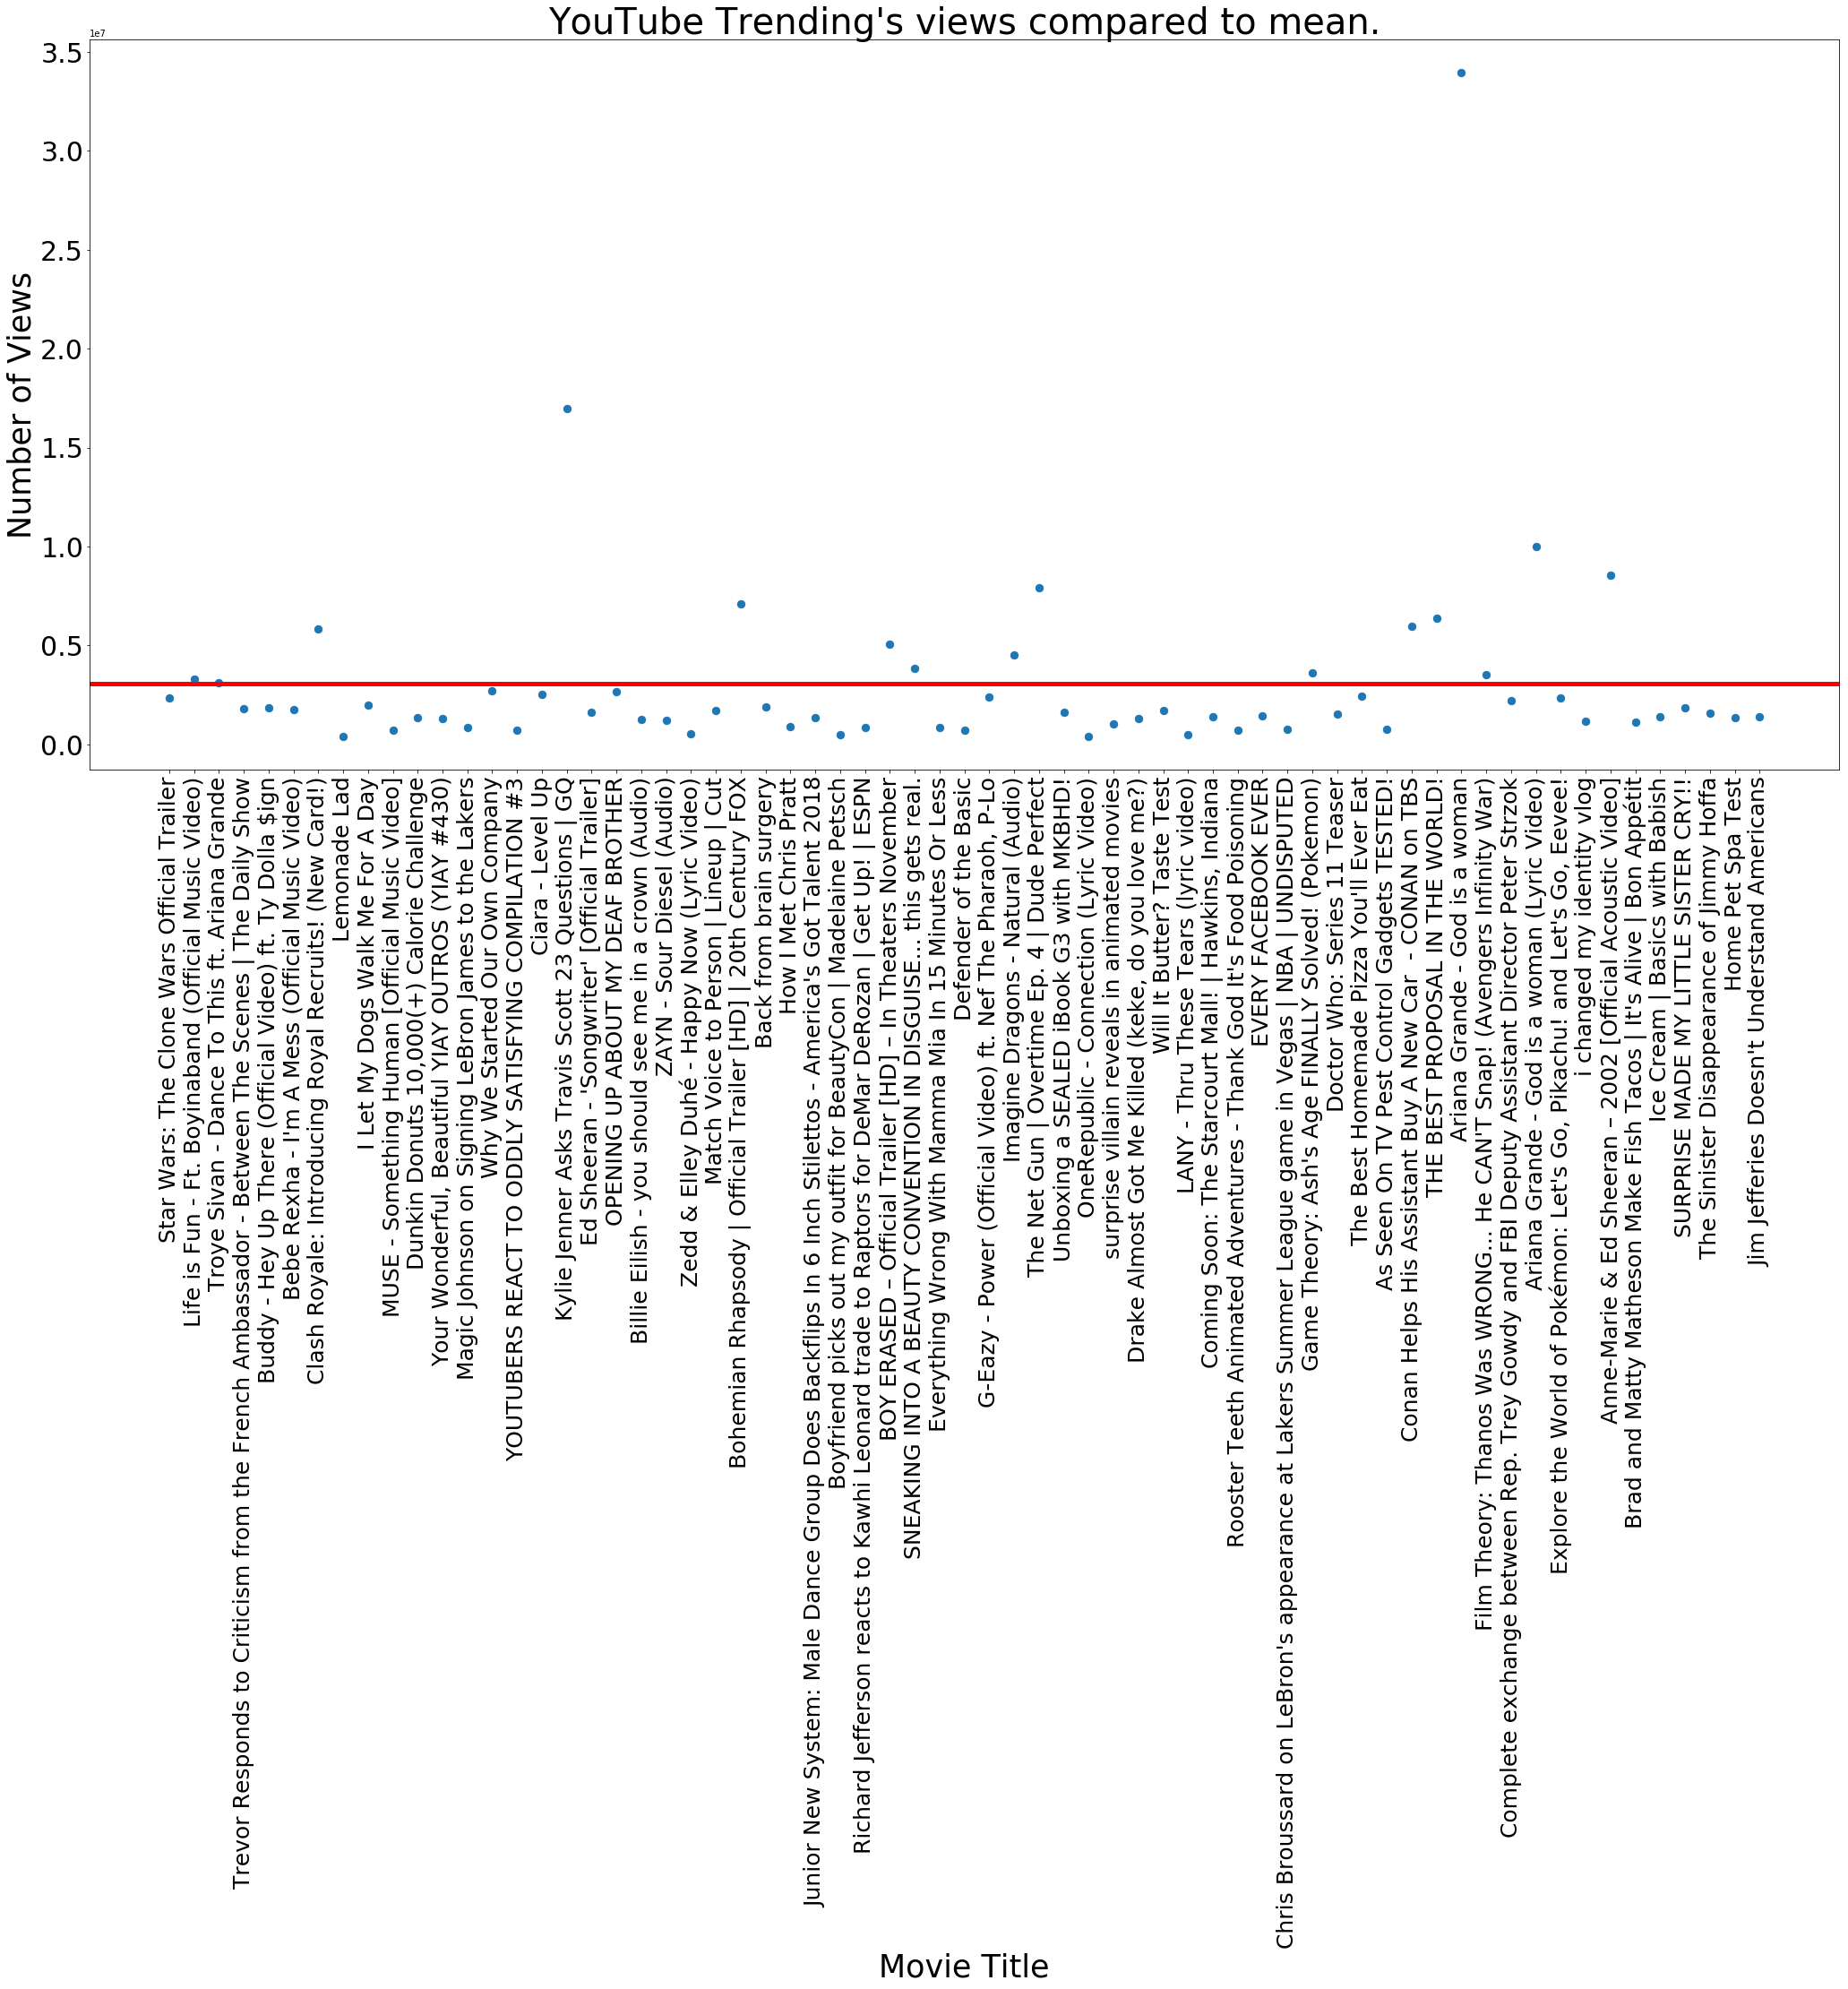

In [156]:
plt.figure(figsize=(35,15))
plt.scatter(trending_df.Title, trending_df.Views, s=70)
plt.title("YouTube Trending's views compared to mean.", size=40)
plt.xlabel("Movie Title", size=35)
plt.xticks(trending_df.Title, rotation='vertical', size=25)
plt.ylabel("Number of Views", size=35)
plt.yticks(size=30)
plt.axhline(np.mean(trending_df.Views), color='red', lw=5)

Mean of views is 2,338,717

In [158]:
trending_df.Views.mean #2,338,717

<bound method Series.mean of 0      2338717
1      3311265
2      3095393
3      1798575
4      1841263
5      1740467
6      5838655
7       393578
8      2005133
9       709493
10     1341692
11     1327179
12      862594
13     2726647
14      698255
15     2509561
16    16977334
17     1604036
18     2664588
19     1252705
20     1205414
21      541093
22     1706394
23     7103709
24     1886556
25      901173
26     1337539
27      501321
28      853434
29     5062144
        ...   
35     7913247
36     1626397
37      395810
38     1052806
39     1319108
40     1720052
41      470203
42     1400780
43      707221
44     1424308
45      750698
46     3616680
47     1552502
48     2421627
49      743595
50     5960150
51     6382623
52    33959204
53     3513939
54     2205374
55     9989365
56     2349940
57     1159990
58     8566525
59     1126516
60     1385141
61     1838310
62     1572824
63     1334622
64     1384634
Name: Views, Length: 65, dtype: int64>